# The Spark Foundation @GRIPJUNE2021

# Task-1: Prediction Using Supervised Machine Learning

Submitted By: Ajita Ranjan Samal

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the Data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data Read Successfully")

Data Read Successfully


In [3]:
#Print the Data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Print the first 5 row of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Check the null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there is no null values in the dataset,we can visualize our data and find the relationship between the data.

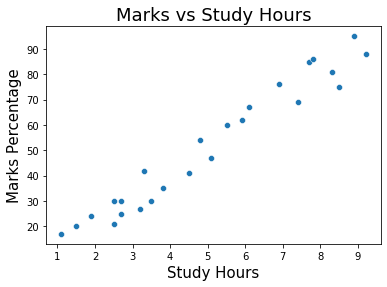

In [7]:
#Plotting the distribution of score
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Marks vs Study Hours' , size=18)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Study Hours' , size=15)
plt.show()


From the above scatterplot shows that there is a positive linear relation between the 'Number of hours studied' and 'Percentage of Score'.

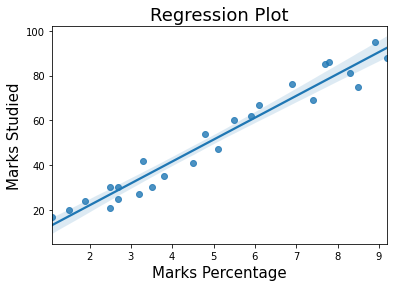

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
#Plotting the Regression Line
sns.regplot(x = data['Hours'], y = data['Scores'])
plt.title('Regression Plot', size=18)
plt.xlabel('Marks Percentage',size=15)
plt.ylabel('Marks Studied',size=15)
plt.show()

#correlation
print(data.corr())

From the above output it is conformed that the variables are positively correleted.

# Preparing the Data

The next step is to divide the data into "attribute"(input) and "labels"(output)

In [14]:
#choose x & y
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [16]:
#Splitting the data into training & test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)

we have to split the dataset as 75% Training data & 25% Test data.

# Training The Model

We will be using Linear Regression which is a supervised Machine Learning Algorithm.

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

# Making Prediction 

In [18]:
#Predicting the Score
y_pred = lr.predict(x_test)

In [19]:
#Comparing Actual vs predicted
df = pd.DataFrame({'Hours' : [i[0] for i in x_test] , 'predicted Marks' : [k for k in y_pred]})
df

,Hours,predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [21]:
Compare_score = pd.DataFrame({'Actual Marks' : y_test , 'predicted Marks' : y_pred})
Compare_score

,Actual Marks,predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


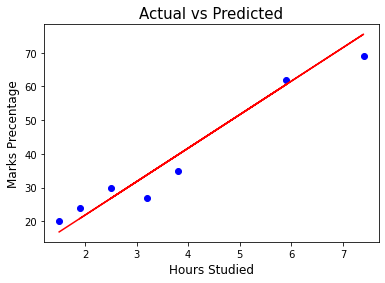

In [22]:
plt.scatter(x=x_test , y=y_test , color = 'b')
plt.plot(x_test, y_pred, color='r')
plt.title('Actual vs Predicted',size=15)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Marks Precentage', size=12)
plt.show()

# Evaluating the model

In [24]:
from sklearn import metrics as m
print('Mean Absolute Error:',m.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482


Small value of mean absolute states that the chances of error or wrong forcasting through the model are very less.

You can predict the marks by giving the input of number of hours studied.

eg:- What will be the predicted score of a student if he studied for 9.25 hrs/day?

In [25]:
hours = [9.25]
answer = lr.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
